importing libraries

In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from pathlib import Path
import os
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from keras.applications.resnet import preprocess_input

importing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = ('/content/drive/MyDrive/skin disease/train')
test_data = ('/content/drive/MyDrive/skin disease/test')

In [ ]:
train_data

'/content/drive/MyDrive/skin disease/train'

In [ ]:
test_data

'/content/drive/MyDrive/skin disease/test'

In [ ]:
class_names = ['actinic keratosis',
               'basal cell carcinoma',
               'dermatofibroma',
               'melanoma',
               'nevus',
               'pigmented benign keratosis',
               'seborrheic keratosis',
               'squamous cell carcinoma',
               'vascular lesion']
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


data augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)



In [ ]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)



In [ ]:

training_set = train_datagen.flow_from_directory(
    train_data,
    target_size =(180,180),
    batch_size = 64,
    class_mode = 'categorical'
    )

Found 2230 images belonging to 9 classes.


In [ ]:

testing_set = test_datagen.flow_from_directory(
    test_data,
    target_size = (180,180),
    batch_size = 64,
    class_mode = 'categorical'
)

Found 134 images belonging to 9 classes.


model creation

In [ ]:
#cnn
cnn = tf.keras.models.Sequential()

In [ ]:

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3,activation='relu',input_shape=[180,180,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=9,activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 43, 43, 64)        0         
                                                                 
 flatten (Flatten)           (None, 118336)            0

optimizing the model

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
cnn.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
History = cnn.fit(x=training_set,validation_data=testing_set,epochs=30)

Epoch 1/30
35/35 [==============================] - 688s 19s/step - loss: 2.8516 - accuracy: 0.2247 - val_loss: 2.1901 - val_accuracy: 0.1642
Epoch 2/30
35/35 [==============================] - 57s 2s/step - loss: 1.7022 - accuracy: 0.3785 - val_loss: 2.2040 - val_accuracy: 0.2537
Epoch 3/30
35/35 [==============================] - 57s 2s/step - loss: 1.5242 - accuracy: 0.4623 - val_loss: 2.0383 - val_accuracy: 0.2910
Epoch 4/30
35/35 [==============================] - 57s 2s/step - loss: 1.4512 - accuracy: 0.4942 - val_loss: 2.3465 - val_accuracy: 0.2612
Epoch 5/30
35/35 [==============================] - 57s 2s/step - loss: 1.3876 - accuracy: 0.5121 - val_loss: 2.0202 - val_accuracy: 0.3134
Epoch 6/30
35/35 [==============================] - 57s 2s/step - loss: 1.3992 - accuracy: 0.5013 - val_loss: 2.4524 - val_accuracy: 0.2612
Epoch 7/30
35/35 [==============================] - 57s 2s/step - loss: 1.3298 - accuracy: 0.5296 - val_loss: 2.1346 - val_accuracy: 0.2687
Epoch 8/30
35/35 [

Result of loss

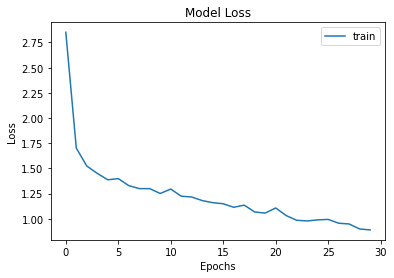

In [ ]:
plt.plot(History.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train'])
plt.show()

Result of Accuracy

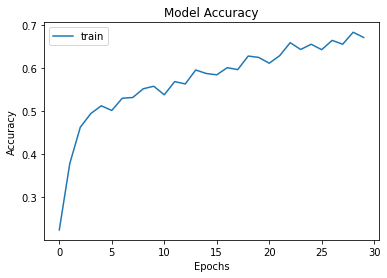

In [ ]:
plt.plot(History.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train'])
plt.show()

GUI from the help of gradio

In [ ]:
pip install gradio

     |████████████████████████████████| 2.9 MB 8.2 MB/s 
     |████████████████████████████████| 1.1 MB 46.3 MB/s 
     |████████████████████████████████| 53 kB 2.4 MB/s 
     |████████████████████████████████| 253 kB 71.6 MB/s 
     |████████████████████████████████| 212 kB 71.1 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 2.0 MB 58.9 MB/s 
     |████████████████████████████████| 84 kB 3.8 MB/s 
     |████████████████████████████████| 271 kB 72.4 MB/s 
     |████████████████████████████████| 94 kB 4.0 MB/s 
     |████████████████████████████████| 144 kB 75.4 MB/s 
     |████████████████████████████████| 58 kB 7.1 MB/s 
     |████████████████████████████████| 10.9 MB 55.9 MB/s 
     |████████████████████████████████| 79 kB 10.2 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 856 kB 71.3 MB/s 
     |███████████████████████

In [ ]:
import gradio
import gradio as gr

/usr/local/lib/python3.7/dist-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [ ]:
def predict_image(img):
  inp = img.reshape((-1,180,180,3))


  prediction = cnn.predict(inp).flatten()
  return { class_names[i]: float(prediction[i]) for i in range(9)}

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=9)

gr.Interface(
    fn=predict_image,
    inputs=image,
    outputs=label,
    capture_session=True).launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/interface.py:248: UserWarning: The `capture_session` parameter in the `Interface` is deprecated and may be removed in the future.
  "The `capture_session` parameter in the `Interface`"


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://17409.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
